# **Transformer 7**

In [2]:
### PACKAGES

import gdown
import os
import numpy as np
import pickle as pkl

In [3]:
### FUNCTIONS

from src.configs import constants, names

from src.libs.visualization import plot_losses

from src.model.pipeline_transformer import TransformerPipeline

In [4]:
### DOWNLOAD PIPELINE AND LOSSES (IF NEEDED)


# os.makedirs(
#     os.path.join(constants.OUTPUT_FOLDER, "transformer_7", "training"),
#     exist_ok=True,
# )

# gdown.download(
#     "https://drive.google.com/uc?id=1QdV5rOrYKDbKekiWs7m74C48sKFIX7Oa",
#     os.path.join(constants.OUTPUT_FOLDER, "transformer_7", "training", "pipeline.pkl"),
#     quiet=False,
# )

# gdown.download(
#     "https://drive.google.com/uc?id=1mhqQl2N-0EQjI7SThBZ4CfBX9d1HRk_e",
#     os.path.join(constants.OUTPUT_FOLDER, "transformer_7", "training", "pipeline.pkl"),
#     quiet=False,
# )

# gdown.download(
#     "https://drive.google.com/uc?id=1IkbSyRqIPK9umG8vsuV5TVFsL_uaX9Vx",
#     os.path.join(constants.OUTPUT_FOLDER, "transformer_7", "training", "pipeline.pkl"),
#     quiet=False,
# )


In [5]:
### LOAD FILES

with open(
    os.path.join(constants.OUTPUT_FOLDER, "transformer_7", "training", "pipeline.pkl"),
    "rb",
) as file:
    pipeline: TransformerPipeline = pkl.load(file)
    pipeline.params[names.DEVICE] = "cpu"
    pipeline.model.to("cpu")
    pipeline.model.params[names.DEVICE] = "cpu"

train_loss = np.load(
    os.path.join(constants.OUTPUT_FOLDER, "transformer_7", "training", "train_loss.npy")
)

valid_loss = np.load(
    os.path.join(constants.OUTPUT_FOLDER, "transformer_7", "training", "valid_loss.npy")
)

In [6]:
### PARAMETERS OF THE MODEL

pipeline.params

{'model_type': 'transformer',
 'src_language': 'en',
 'tgt_language': 'fr',
 'tokenization': 'advanced',
 'embedding_dimension': 64,
 'max_length_src': 32,
 'max_length_tgt': 32,
 'max_context_tgt': 8,
 'nb_layers': 4,
 'nb_heads': 4,
 'head_output_dimension': 64,
 'head_size': 16,
 'dropout': 0.1,
 'feedforward_dimension': 256,
 'device': 'cpu',
 'nb_epochs': 2,
 'learning_rate': 0.0001,
 'batch_size': 32,
 'num_workers': 4,
 'betas': (0.9, 0.98),
 'epsilon': 1e-09,
 'lambda_init': 0.8}

In [7]:
### NUMBER OF TRAINABLE PARAMETERS

print(
    f"Number of parameters for the Diff Transformer : {(sum(p.numel() for p in pipeline.model.parameters()) / 1e6):.2f} millions"
)

Number of parameters for the Diff Transformer : 57.48 millions


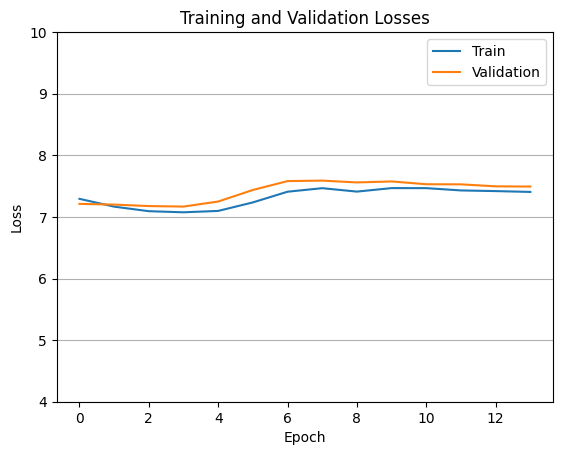

In [8]:
### PLOT LOSS EVOLUTION

plot_losses(train_losses=train_loss, valid_losses=valid_loss)

In [9]:
### METRICS ON THE TEST SET

print(f"ROUGE-1 Score : {pipeline.metrics['rouge_1']:.4f}")
print(f"ROUGE-L Score : {pipeline.metrics['rouge_l']:.4f}")

ROUGE-1 Score : 0.0142
ROUGE-L Score : 0.0142


In [10]:
### TRANSLATION

text = "it is good"


translation = pipeline.model.translate(
    src_vocab=pipeline.src_vocab,
    tgt_vocab_reversed=pipeline.tgt_vocab_reversed,
    src_text=text,
)

print(translation)

le du d cas entreprises sujet en aux moyens wintering d l grace des britannique aux en l est t usines un d homme autochtones cas commerciale protection y par cette pas
